In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression

In [3]:
bank=pd.read_csv(r"E:\assignment\Assignment no 6\bank-full-A6.csv")

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank.rename(columns={'y': 'cla'}, inplace=True)
bank['cla'] = bank['cla'].map({'no': 0, 'yes': 1})


In [9]:
bank.shape

(45211, 17)

In [10]:
bank.cla.value_counts()

0    39922
1     5289
Name: cla, dtype: int64

In [11]:
for var in bank:
    print(bank[var].value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
c

In [12]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [13]:
bank.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [14]:
count_list = ['age', 'job', 'marital', 'education', 'contact', 'month', 'poutcome']

E:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


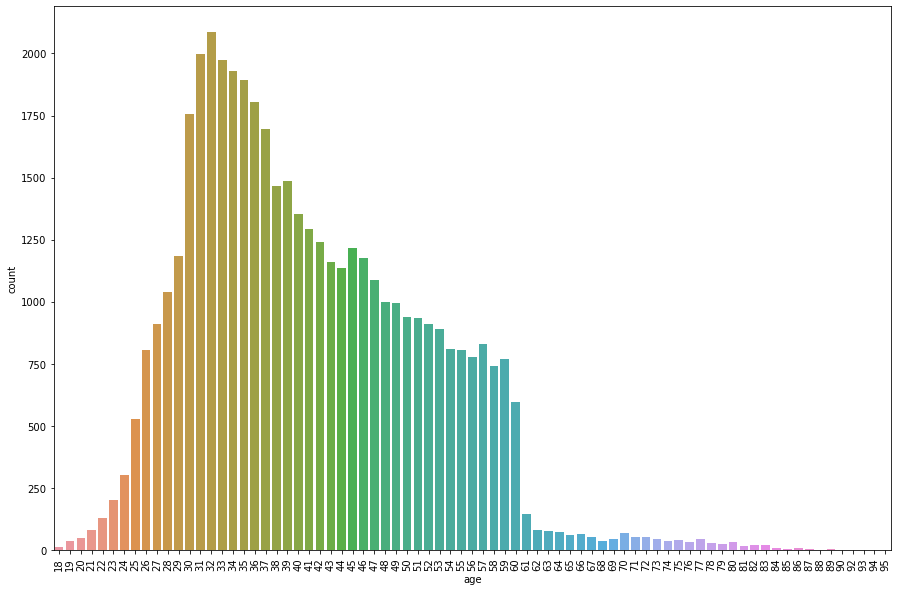

E:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


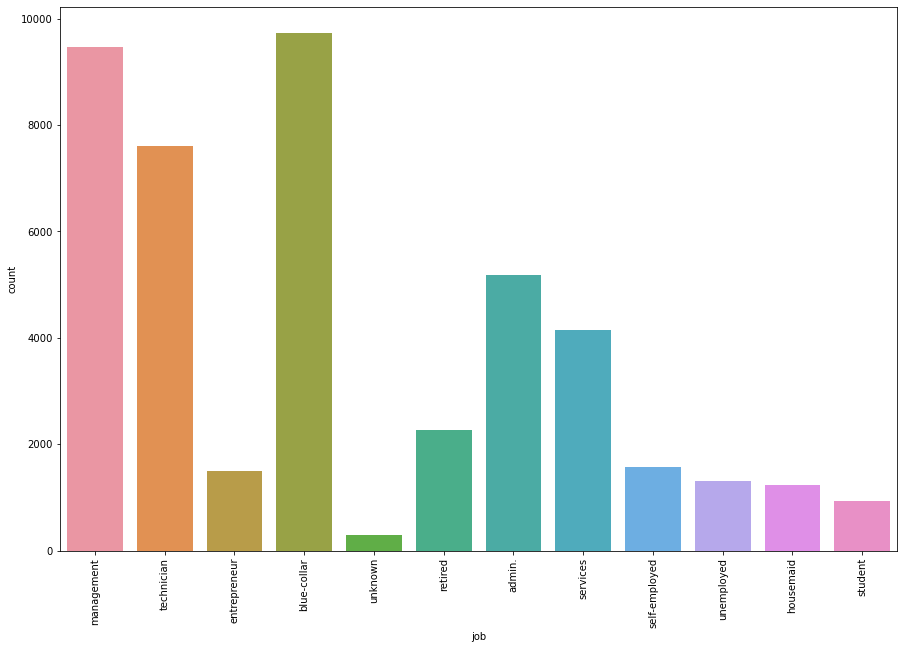

E:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


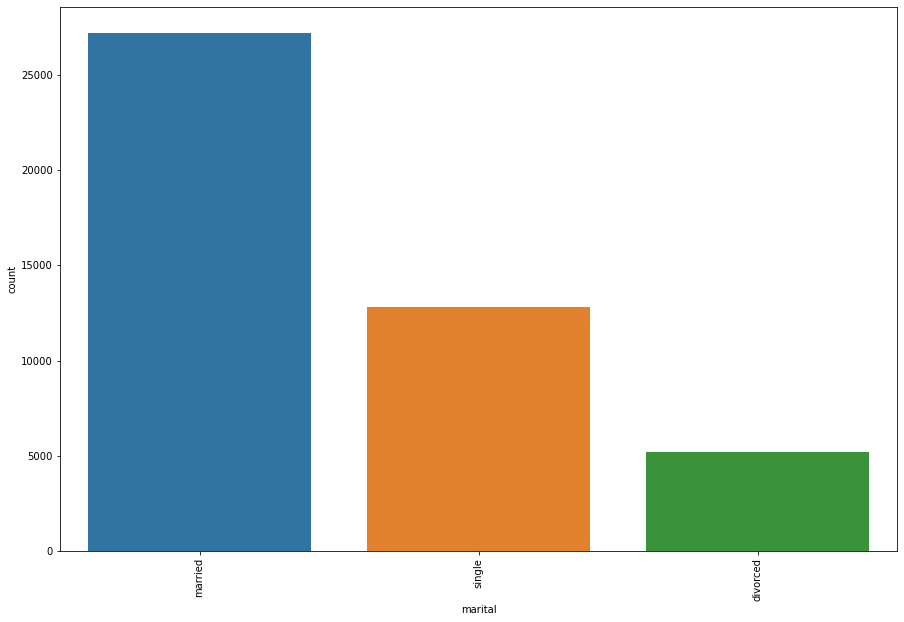

E:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


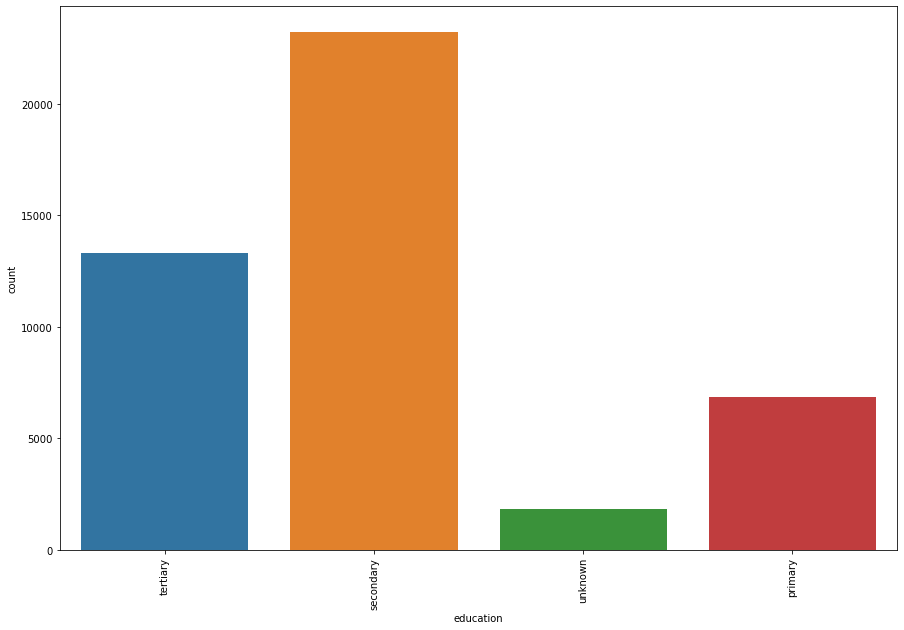

E:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


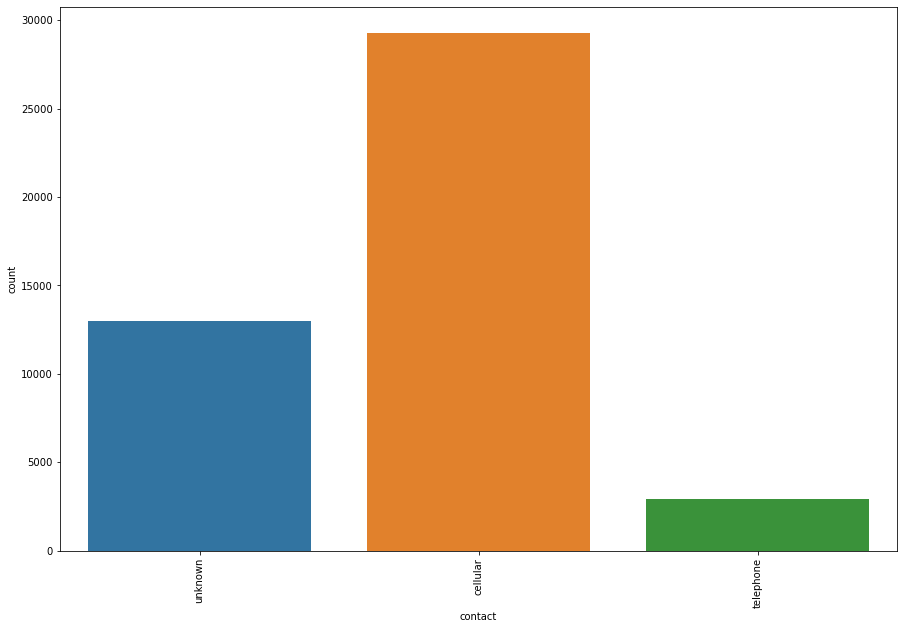

E:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


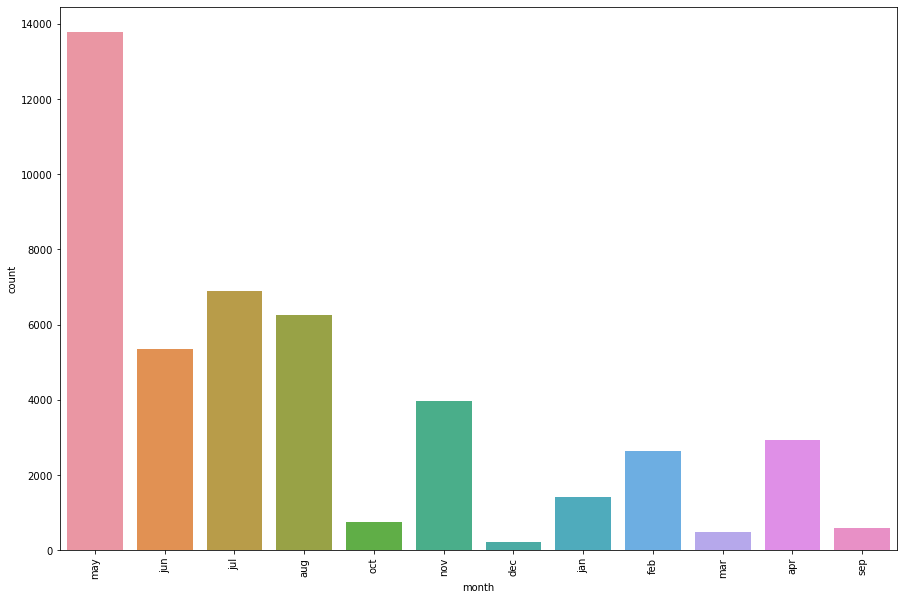

E:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


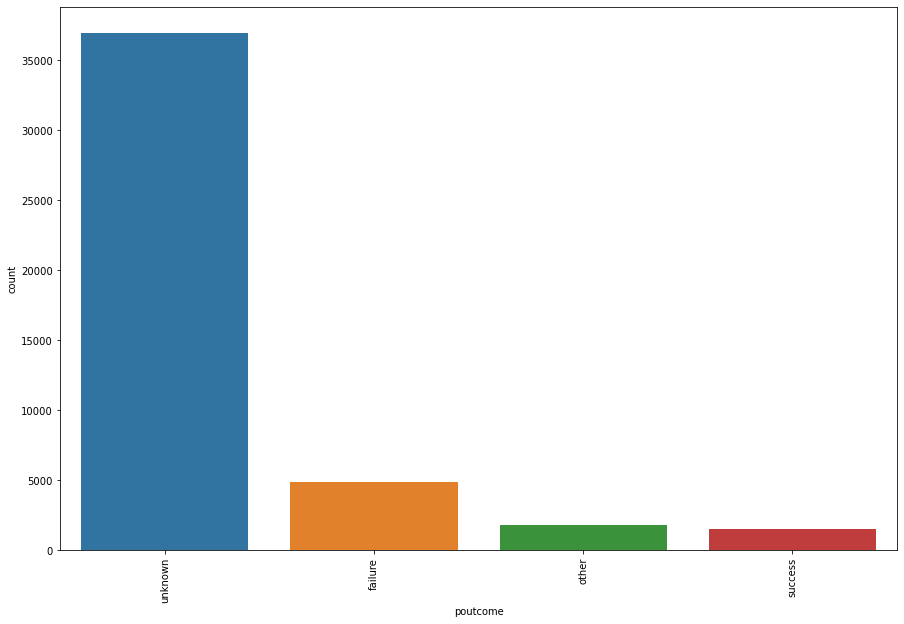

In [15]:
for feature in count_list:
    plt.figure(figsize=(15, 10))
    sns.countplot(feature, data=bank)
    plt.xticks(rotation=90)
    plt.show()

E:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


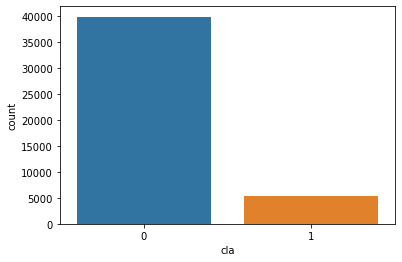

In [16]:
sns.countplot('cla', data=bank)
plt.show()


E:\anakonda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


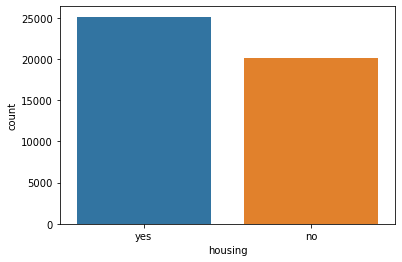

In [17]:
sns.countplot('housing',data=bank)
plt.show()

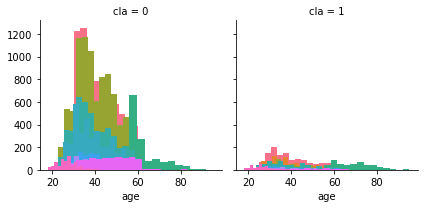

In [18]:
age = sns.FacetGrid(data=bank, col='cla',hue='job')
age.map(plt.hist, 'age', bins=20)
plt.show()

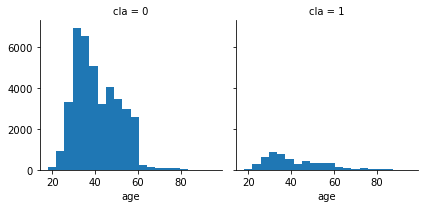

In [19]:
age = sns.FacetGrid(data=bank, col='cla')
age.map(plt.hist, 'age', bins=20)
plt.show()

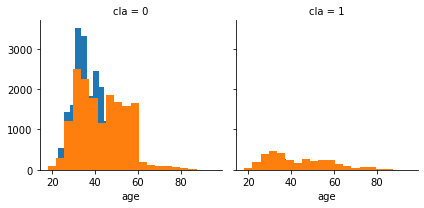

In [20]:
age = sns.FacetGrid(data=bank, col='cla',hue='housing')
age.map(plt.hist, 'age', bins=20)
plt.show()

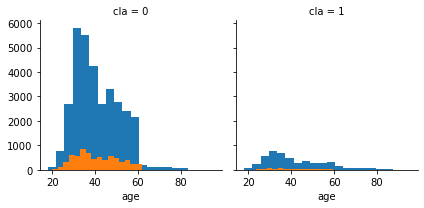

In [21]:
age = sns.FacetGrid(data=bank, col='cla',hue='loan')
age.map(plt.hist, 'age', bins=20)
plt.show()

<AxesSubplot:xlabel='job', ylabel='Count'>

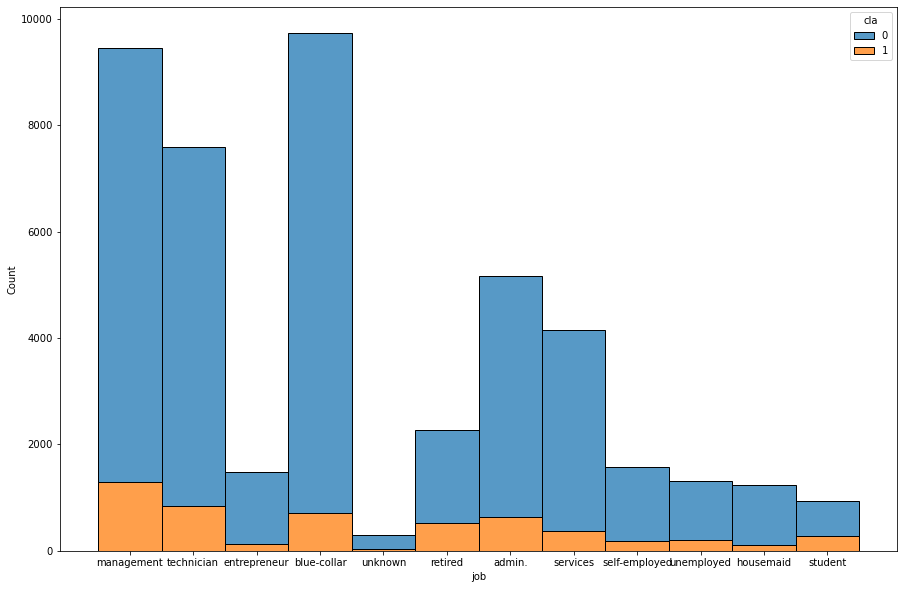

In [22]:
plt.figure(figsize=(15,10))
sns.histplot(x='job',data=bank,hue='cla',multiple='stack')

In [23]:
# labeling for input class and target class

x = bank.drop(['cla'], axis=1)

y = bank['cla']

In [24]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cla, dtype: int64

In [27]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import category_encoders as ce

In [29]:
encoder=ce.OneHotEncoder(cols=['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [30]:
x = encoder.fit_transform(x)

In [31]:
x

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,month_12,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
0,58,1,0,0,0,0,0,0,0,0,...,0,0,261,1,-1,0,1,0,0,0
1,44,0,1,0,0,0,0,0,0,0,...,0,0,151,1,-1,0,1,0,0,0
2,33,0,0,1,0,0,0,0,0,0,...,0,0,76,1,-1,0,1,0,0,0
3,47,0,0,0,1,0,0,0,0,0,...,0,0,92,1,-1,0,1,0,0,0
4,33,0,0,0,0,1,0,0,0,0,...,0,0,198,1,-1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,1,0,0,0,0,0,0,0,...,0,0,977,3,-1,0,1,0,0,0
45207,71,0,0,0,0,0,1,0,0,0,...,0,0,456,2,-1,0,1,0,0,0
45208,72,0,0,0,0,0,1,0,0,0,...,0,0,1127,5,184,3,0,0,0,1
45209,57,0,0,0,1,0,0,0,0,0,...,0,0,508,4,-1,0,1,0,0,0


In [32]:
x.columns

Index(['age', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'job_11', 'job_12', 'marital_1',
       'marital_2', 'marital_3', 'education_1', 'education_2', 'education_3',
       'education_4', 'default_1', 'default_2', 'balance', 'housing_1',
       'housing_2', 'loan_1', 'loan_2', 'contact_1', 'contact_2', 'contact_3',
       'day', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome_1', 'poutcome_2',
       'poutcome_3', 'poutcome_4'],
      dtype='object')

In [33]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train = scaler.fit_transform(x)

In [35]:
x_train

array([[ 1.26666667,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33333333,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.2       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.2       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13333333,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [36]:
cols = x.columns
x_train = pd.DataFrame(x_train, columns=[cols])

In [37]:
x_train.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,month_12,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
0,1.266667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.375000,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.134259,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.481481,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,0.533333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.407407,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.083333,-0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
classifier=LogisticRegression()

In [39]:
classifier.fit(x_train,y)

E:\anakonda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_predict=classifier.predict(x_train)

E:\anakonda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [41]:
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [42]:
y_pred_df=pd.DataFrame({'actual':y,'predicted':y_predict})

In [43]:
y_pred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [44]:
y_pred_df.actual.value_counts()

0    39922
1     5289
Name: actual, dtype: int64

In [45]:
y_pred_df.predicted.value_counts()

0    42609
1     2602
Name: predicted, dtype: int64

In [46]:
correct=y_pred_df['actual']==y_pred_df['predicted']

In [47]:
correct

0         True
1         True
2         True
3         True
4         True
         ...  
45206     True
45207    False
45208     True
45209     True
45210     True
Length: 45211, dtype: bool

In [48]:
accuracy=correct.mean()*100
print('\n accuracy of model = ', accuracy )


 accuracy of model =  90.10196633562629


In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm=confusion_matrix(y,y_predict)

In [51]:
cm

array([[39028,   894],
       [ 3581,  1708]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.66      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.65      0.69     45211
weighted avg       0.89      0.90      0.89     45211



In [54]:
import seaborn as sns

<AxesSubplot:>

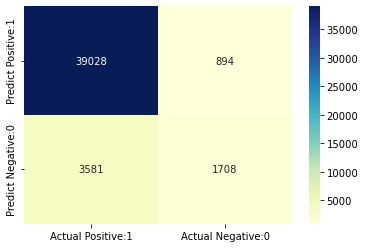

In [55]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# checking accuracy by splitting data in trian and test by 0.7/0.3 ratio

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y ,test_size=0.3 )

In [57]:
x_train.shape

(31647, 51)

In [58]:
x_test.shape

(13564, 51)

In [59]:
y_train.shape

(31647,)

In [60]:
y_test.shape

(13564,)

In [61]:
classifier=LogisticRegression()

In [62]:
classifier.fit(x_train,y_train)

E:\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
predicted_y=classifier.predict(x_test)
print(predicted_y)

[0 0 0 ... 0 0 0]


In [64]:
accuracy_train_m = np.mean(y_test==predicted_y)
accuracy_train_m

0.8902978472427012

In [65]:
#checking for x_trin data itsef

In [66]:
predicted_y=classifier.predict(x_train)

In [67]:
predicted_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
accuracy_train_m = np.mean(y_train==predicted_y)
accuracy_train_m

0.8906057446203431

# accuracy is not shifted too much that means model learn on test data set which is very very good

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,predicted_y)
cm

array([[27409,   529],
       [ 2933,   776]], dtype=int64)

<AxesSubplot:>

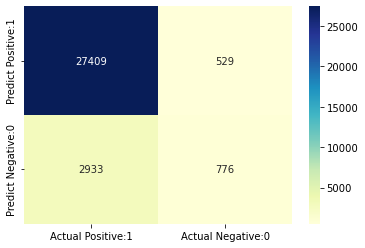

In [70]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')